In [2]:
import statistics
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Materwelon

In [2]:
image = cv2.imread('input\watermelon.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(image)

In [28]:
# Green: 60 degree
# Blue: 120 degree
# H_new = H.copy()
H_new = np.zeros((H.shape[0],H.shape[1]), dtype=np.uint8)
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if 30 < H[i,j] < 90: # Green
            H_new[i,j] = 0
        elif H[i,j] < 30 or H[i,j] > 150: # Red
            H_new[i,j] += 60
            if H_new[i,j] > 180:
                H_new[i,j] -= 180

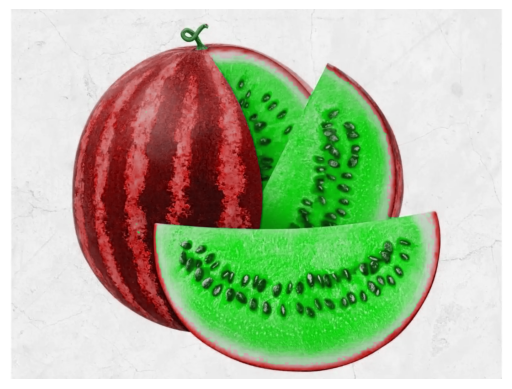

In [29]:
result = cv2.merge((H_new, S, V))
result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
plt.imshow(result)
plt.axis('off')
plt.show()

## Color Recognition

In [19]:
cap = cv2.VideoCapture('input/colors2.mp4')
_, frame = cap.read()
rows, cols, _ = frame.shape
n = 0

writer = cv2.VideoWriter('output\mamad.mp4', cv2.VideoWriter_fourcc(*'MJPG'), 30, (cols, rows))

while True:
    n+=1
    _, frame_org = cap.read()
    frame_detect = frame_org[(rows//2 - 50):(rows//2 + 50), (cols//2 - 50):(cols//2 + 50)].copy()
    frame_filtered = cv2.blur(frame_org, [15, 15]) 
    cv2.rectangle(frame_filtered, (cols//2 - 50,rows//2 - 50), (cols//2 + 50,rows//2 + 50), 0,8)
    image = cv2.cvtColor(frame_detect, cv2.COLOR_BGR2HSV)
    # H, S, V = cv2.split(image)
    mean = np.mean(image, axis=(0,1))
    var = statistics.variance([image[0,0,0],image[49,0,0],image[-1,0,0],
                            image[0,49,0],image[49,49,0],image[-1,49,0],
                            image[0,-1,0],image[49,-1,0],image[-1,-1,0]])
    H = mean[0]
    S = mean[1]
    V = mean[2]
    if S < 25 and V > 50:
        color = 'White'
    elif 165 < H or H < 10 and var < 10:
        color = 'Red'
    elif 10 < H < 40 and var < 10:
        color = 'Yellow'
    elif 50 < H < 75 and var < 10:
        color = 'Green'
    elif 100 < H < 140 and var < 10:
        color = 'blue'
    elif 140 < H < 160 and var < 10:
        color = 'purple'
    elif V < 120 and S < 50:
        color = 'Black'
    else:
        color = 'unknown'
    cv2.putText(frame_filtered, str(mean), (50,230), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 0, thickness= 1)
    cv2.putText(frame_filtered, str(var), (50,200), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 0, thickness= 1)
    cv2.putText(frame_filtered, color, (150,50), cv2.FONT_HERSHEY_SIMPLEX, 1, 0, thickness= 2)
    frame_filtered[(rows//2 - 50):(rows//2 + 50), (cols//2 - 50):(cols//2 + 50)] = frame_detect
    writer.write(frame_filtered)
    cv2.imshow('result', frame_filtered)
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break
    if n == 2011:
        break

writer.release()
cap.release()
cv2.destroyAllWindows()


## Ballons

In [85]:
image_b = cv2.imread('input/ballons.jpg')
hsv = cv2.cvtColor(image_b, cv2.COLOR_BGR2HSV)
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])
mask = cv2.inRange(hsv, lower_hue, upper_hue)
mask = (mask/255).astype(int)
result = cv2.merge([mask * image_b[:,:,0], mask * image_b[:,:,1], mask * image_b[:,:,2]])
cv2.imwrite('output/ballons.jpg',result)

True

## Skin Detection 👨🏻‍🦲🤚🏻

In [34]:
import imutils
import argparse
import numpy as np
import cv2

ap = argparse.ArgumentParser()
lower = np.array([0, 48, 130], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

frame = cv2.imread('input\skin.jpg')
frame = imutils.resize(frame, width = 400)
converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
skinMask = cv2.inRange(converted, lower, upper)
# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
# blur the mask to help remove noise, then apply the
# mask to the frame
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
skin = cv2.bitwise_and(frame, frame, mask = skinMask)
# show the skin in the image along with the mask
cv2.imshow("images", np.hstack([frame, skin]))
cv2.imwrite("output/skin.jpg", skin)
cv2.waitKey()

-1

## Blue Screen Technique 🟩🟦

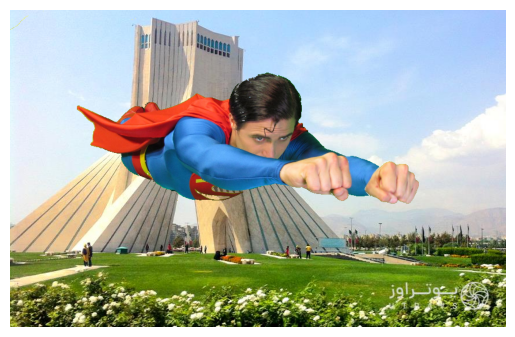

In [75]:
image_azadi = cv2.imread('input/azadi_square.jpg')
image_superman = cv2.imread('input/SuperMan.jpg')
image_superman = cv2.resize(image_superman, (image_azadi.shape[1], image_azadi.shape[0]))
image_superman_HSV = cv2.cvtColor(image_superman, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(image_superman_HSV)
image_superman_mask = np.zeros((image_azadi.shape), dtype=np.uint8)
image_superman_mask = image_superman
for i in range(image_azadi.shape[0]):
    for j in range(image_azadi.shape[1]//2):
        if 35 < H[i, j] < 75 and V[i, j] > 55 :
            image_superman_mask[i,j] = image_azadi[i, j]
    for j in range(image_azadi.shape[1]//2, image_azadi.shape[1]):
        if 30 < H[i, j] < 90 and V[i, j] > 140 :
            image_superman_mask[i,j] = image_azadi[i, j]
for i in range(image_azadi.shape[0]//2, image_azadi.shape[0]):
    for j in range(image_azadi.shape[1]//2, image_azadi.shape[1]):
        if 35 < H[i, j] < 75 and V[i, j] > 55 :
            image_superman_mask[i,j] = image_azadi[i, j]
result = cv2.cvtColor(image_superman_mask, cv2.COLOR_BGR2RGB)
plt.imshow(result)
plt.axis('off')
plt.show()


## Change your clothes color

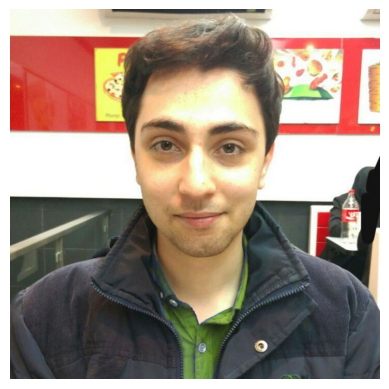

In [158]:
image = cv2.imread('input/me.jpg')
image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(image_HSV)
result = np.zeros((image.shape), dtype=np.uint8)
H_new = np.zeros((H.shape), dtype=np.uint8)
H_new = H

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if (90 < H[i, j] < 120 and V[i,j] < 200 and S[i, j] > 100) or False:
            H_new[i, j] += 120
            if H_new[i, j] >= 180:
                H_new[i, j] -= 180

result = cv2.merge([H_new, S, V])            
result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
plt.imshow(result)
plt.axis('off')
plt.show()

## Change Spiderman's clothes to green and yellow. 🕷️

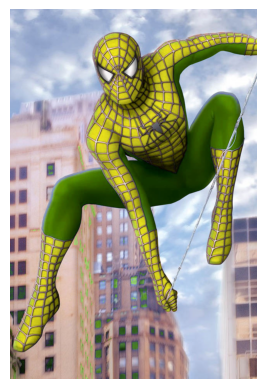

In [172]:
image = cv2.imread('input/spiderman.jpg')
image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
H, S, V = cv2.split(image_HSV)
result = np.zeros((image.shape), dtype=np.uint8)
H_new = np.zeros((H.shape), dtype=np.uint8)
H_new = H

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if 90 < H[i, j] < 150 and 100 < S[i, j]:
            H_new[i, j] += 120
        elif (150 < H[i, j] or 30 > H[i, j]) and 100 < S[i, j]:
            H_new[i, j] += 30
        
        if H_new[i, j] >= 180:
            H_new[i, j] -= 180
                
result = cv2.merge([H_new, S, V])            
result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
plt.imshow(result)
plt.axis('off')
plt.show()